In [2]:
import time
import networkx as nx
import matplotlib.pyplot as plt

from itertools import combinations

In [3]:
# On utilise le même graphe pour toutes les implémentations
n = 20
p = 0.3

G = nx.erdos_renyi_graph(n, p)

In [4]:
def afficher_graphe_avec_clique_maximale(G, clique_max, method_name):
    pos = nx.spring_layout(G)
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10)

    nx.draw(G.subgraph(clique_max), pos, node_color="red", node_size=500, font_size=10)

    plt.title(f"{method_name} avec clique maximale en rouge")
    plt.show()

## 1. Approche naïve :

In [5]:
def est_clique(G, S):
    for v, w in combinations(S, 2):
        if not G.has_edge(v, w):
            return False
    return True

def recherche_clique_naive(G):
    n = len(G)
    taille_max_clique = 0
    clique_max = set()

    for i in range(1, n + 1):
        for S in combinations(G.nodes, i):
            if est_clique(G, S) and len(S) > taille_max_clique:
                taille_max_clique = len(S)
                clique_max = set(S)

    return clique_max

## 2. Algorithme de Bron-Kerbosch sans pivot (BronKerbosch1):

In [6]:
def bron_kerbosch1(R, P, X, graph, cliques):
    if not P and not X:
        cliques.append(R)
        return
    for v in list(P):
        N_v = set(graph.neighbors(v))
        bron_kerbosch1(R.union({v}), P.intersection(N_v), X.intersection(N_v), graph, cliques)
        P.remove(v)
        X.add(v)

def find_maximal_cliques_bron_kerbosch1(graph):
    cliques = []
    bron_kerbosch1(set(), set(graph.nodes()), set(), graph, cliques)
    return cliques

## 3. Algorithme de Bron-Kerbosch avec pivot (BronKerbosch2:

In [7]:
def bron_kerbosch2(R, P, X, graph, cliques):
    if not P and not X:
        cliques.append(R)
        return
    u = next(iter(P.union(X)))
    N_u = set(graph.neighbors(u))
    for v in list(P.difference(N_u)):
        N_v = set(graph.neighbors(v))
        bron_kerbosch2(R.union({v}), P.intersection(N_v), X.intersection(N_v), graph, cliques)
        P.remove(v)
        X.add(v)

def find_maximal_cliques_bron_kerbosch2(graph):
    cliques = []
    bron_kerbosch2(set(), set(graph.nodes()), set(), graph, cliques)
    return cliques

## 4. Algorithme de Bron-Kerbosch avec pivot et dégénérescence (BronKerbosch3):



In [8]:
def degeneracy_ordering(graph):
    ordering = []
    degrees = {v: len(list(graph.neighbors(v))) for v in graph.nodes()}
    degree_lists = [[] for _ in range(len(graph) + 1)]
    for v, d in degrees.items():
        degree_lists[d].append(v)

    while degree_lists:
        i = 0
        while i < len(degree_lists) and not degree_lists[i]:
            i += 1
        if i == len(degree_lists):
            break

        v = degree_lists[i].pop()
        ordering.append(v)
        for w in list(graph.neighbors(v)):
            if w not in ordering:
                d = degrees[w]
                degree_lists[d].remove(w)
                degree_lists[d-1].append(w)
                degrees[w] -= 1
    return ordering


def bron_kerbosch3(graph):
    cliques = []
    for v in degeneracy_ordering(graph):
        N_v = set(graph.neighbors(v))
        bron_kerbosch2({v}, N_v, set(), graph, cliques)
    return cliques

In [9]:
# Test de chaque algorithme et mesure du temps d'exécution
start_time = time.time()
clique_max_simple = recherche_clique_naive(G)
print(f"Nombre de cliques maximales trouvées: {len(clique_max_simple)}")
print("Clique maximale (Simple/Naïf):", clique_max_simple)
print("Temps d'exécution (Simple/Naïf): {time.time() - start_time} secondes")

start_time = time.time()
maximal_cliques_bron_kerbosch1 = find_maximal_cliques_bron_kerbosch1(G)
clique_max_bron_kerbosch1 = max(maximal_cliques_bron_kerbosch1, key=len)
print(f"Nombre de cliques maximales trouvées: {len(maximal_cliques_bron_kerbosch1)}")
print(f"Toutes les cliques maximales (Bron-Kerbosch sans pivot) : {maximal_cliques_bron_kerbosch1}")
print(f"Clique maximale (Bron-Kerbosch sans pivot): {clique_max_bron_kerbosch1}")
print(f"Temps d'exécution (Bron-Kerbosch sans pivot): {time.time() - start_time} secondes")

start_time = time.time()
maximal_cliques_bron_kerbosch2 = find_maximal_cliques_bron_kerbosch2(G)
clique_max_bron_kerbosch2 = max(maximal_cliques_bron_kerbosch2, key=len)
print(f"Nombre de cliques maximales trouvées: {len(maximal_cliques_bron_kerbosch2)}")
print(f"Toutes les cliques maximales (Bron-Kerbosch avec pivot) : {maximal_cliques_bron_kerbosch2}")
print(f"Clique maximale (Bron-Kerbosch avec pivot): {clique_max_bron_kerbosch2}")
print(f"Temps d'exécution (Bron-Kerbosch avec pivot): {time.time() - start_time} secondes")


start_time = time.time()
maximal_cliques_bron_kerbosch3 = bron_kerbosch3(G)
clique_max_bron_kerbosch3 = max(maximal_cliques_bron_kerbosch3, key=len)
print(f"Nombre de cliques maximales trouvées: {len(maximal_cliques_bron_kerbosch3)}")
print(f"Toutes les cliques maximales (Bron-Kerbosch avec pivot et dégénérescence) : {maximal_cliques_bron_kerbosch3}")
print(f"Clique maximale (Bron-Kerbosch avec pivot et dégénérescence): {clique_max_bron_kerbosch3}")
print(f"Temps d'exécution (Bron-Kerbosch avec pivot et dégénérescence): {time.time() - start_time} secondes")

Nombre de cliques maximales trouvées: 4
Clique maximale (Simple/Naïf): {0, 18, 12, 5}
Temps d'exécution (Simple/Naïf): {time.time() - start_time} secondes
Nombre de cliques maximales trouvées: 37
Toutes les cliques maximales (Bron-Kerbosch sans pivot) : [{0, 10, 4}, {0, 19, 4}, {0, 18, 12, 5}, {0, 8, 19}, {0, 10, 18, 12}, {0, 10, 13}, {0, 19, 13}, {8, 1}, {16, 1}, {1, 10}, {1, 15}, {2, 18, 6}, {2, 12, 7}, {2, 13, 7}, {8, 2}, {2, 11}, {2, 18, 12}, {16, 3, 6, 14}, {18, 3, 6}, {16, 3, 7}, {9, 19, 4}, {4, 7}, {16, 5, 7}, {12, 5, 7}, {16, 9, 5}, {9, 18, 5}, {16, 5, 14}, {17, 6}, {17, 12, 7}, {17, 13, 7}, {8, 9, 19}, {9, 19, 17}, {10, 11}, {19, 11, 14}, {11, 14, 15}, {17, 19, 13}, {18, 15}]
Clique maximale (Bron-Kerbosch sans pivot): {0, 18, 12, 5}
Temps d'exécution (Bron-Kerbosch sans pivot): 0.0012202262878417969 secondes
Nombre de cliques maximales trouvées: 37
Toutes les cliques maximales (Bron-Kerbosch avec pivot) : [{0, 10, 4}, {0, 19, 4}, {0, 18, 12, 5}, {0, 8, 19}, {0, 10, 18, 12}, {

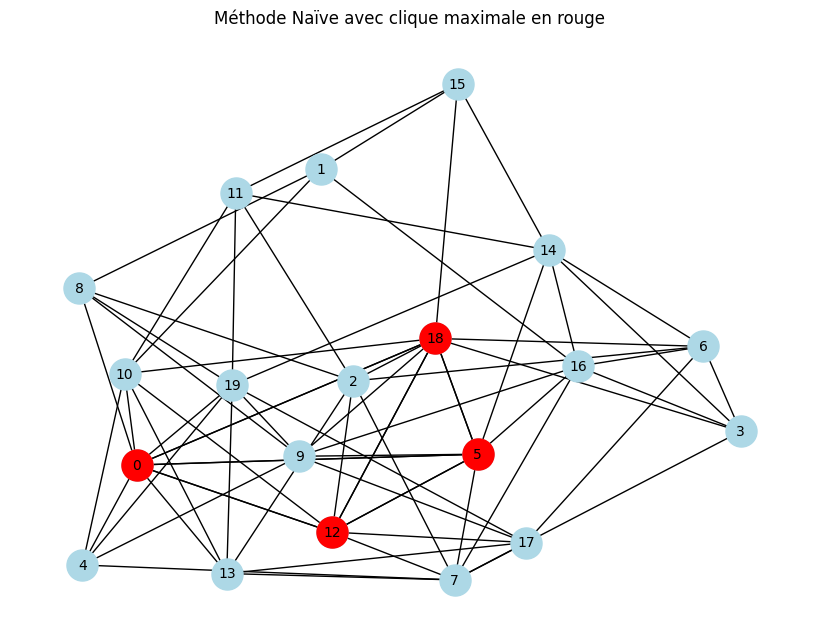

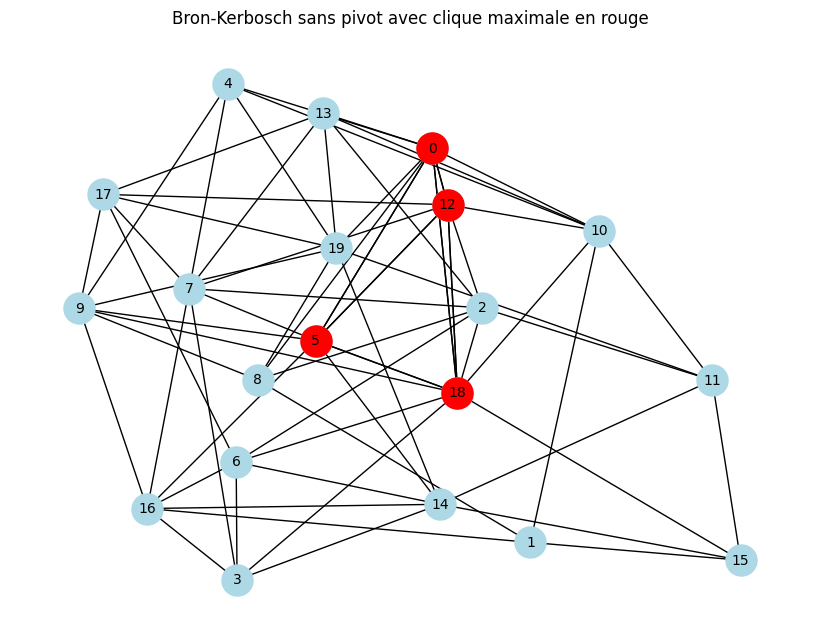

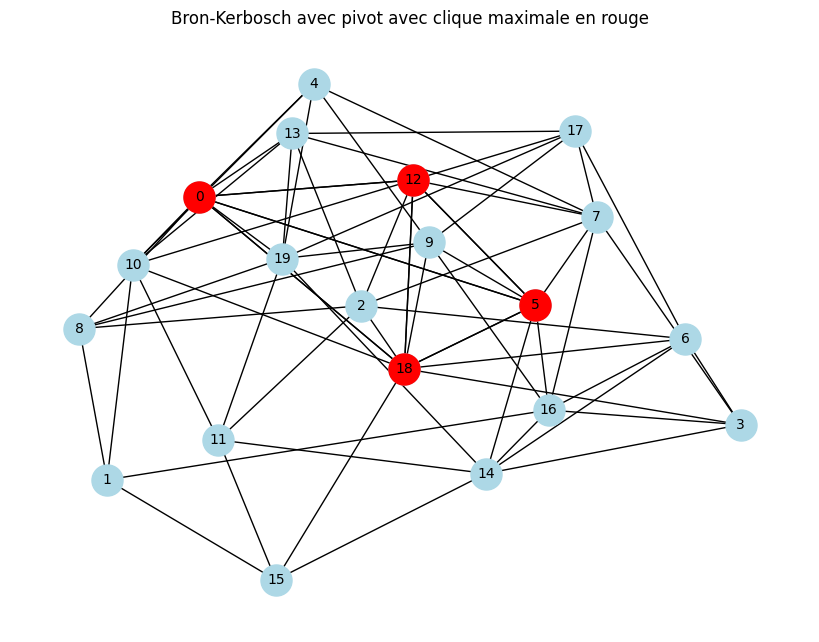

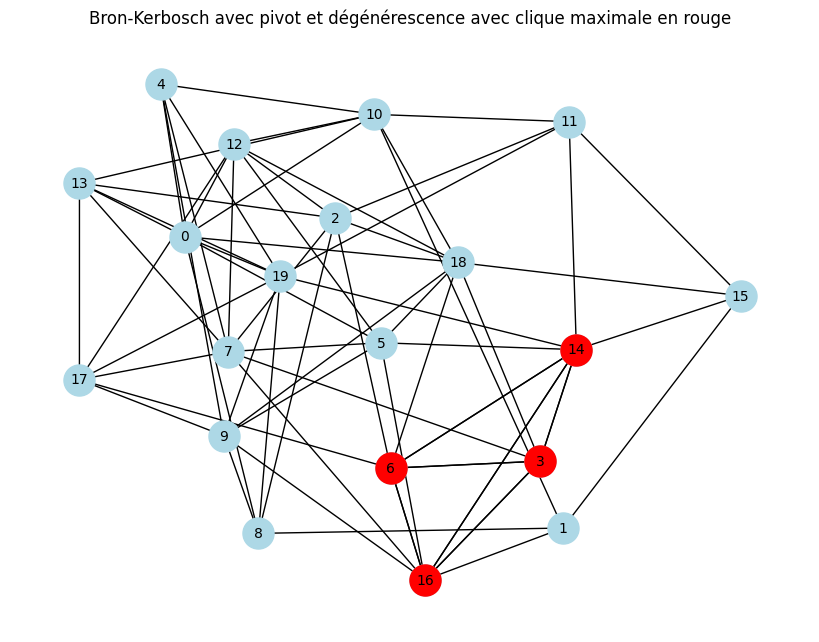

In [10]:
afficher_graphe_avec_clique_maximale(G, clique_max_simple, "Méthode Naïve")
afficher_graphe_avec_clique_maximale(G, clique_max_bron_kerbosch1, "Bron-Kerbosch sans pivot")
afficher_graphe_avec_clique_maximale(G, clique_max_bron_kerbosch2, "Bron-Kerbosch avec pivot")
afficher_graphe_avec_clique_maximale(G, clique_max_bron_kerbosch3, "Bron-Kerbosch avec pivot et dégénérescence")

La version naïve est trop lente pour l'exécution. De ce fait, nous l'avons donc enlever du benchmark car nous voulons aussi tester le code avec de très grandes valeurs

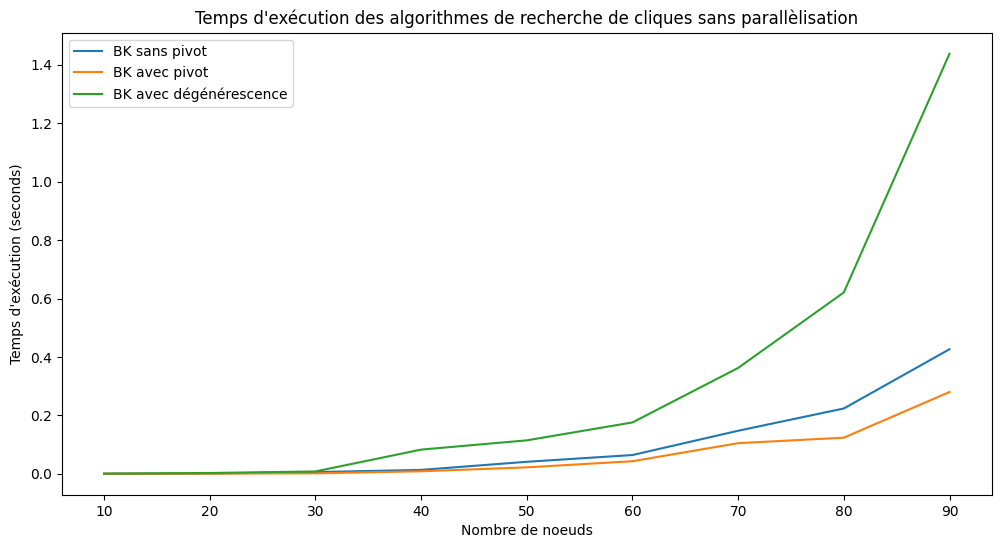

In [11]:
graph_sizes = [i for i in range(10, 100, 10)]
p = 0.5
bk_without_times = []
bk_with_times = []
bk_with_degeneracy_times = []

for n in graph_sizes:
    G = nx.erdos_renyi_graph(n, p)

    start_time = time.time()
    find_maximal_cliques_bron_kerbosch1(G)
    bk_without_times.append(time.time() - start_time)

    start_time = time.time()
    find_maximal_cliques_bron_kerbosch2(G)
    bk_with_times.append(time.time() - start_time)

    start_time = time.time()
    bron_kerbosch3(G)
    bk_with_degeneracy_times.append(time.time() - start_time)

plt.figure(figsize=(12, 6))
plt.plot(graph_sizes, bk_without_times, label='BK sans pivot')
plt.plot(graph_sizes, bk_with_times, label='BK avec pivot')
plt.plot(graph_sizes, bk_with_degeneracy_times, label='BK avec dégénérescence')
plt.xlabel('Nombre de noeuds')
plt.ylabel('Temps d\'exécution (seconds)')
plt.title('Temps d\'exécution des algorithmes de recherche de cliques sans parallèlisation')
plt.legend()
plt.show()

L'agorithme de BK avec pivot semble être la plus rapide pour trouver les cliques maximales.

Celui avec dégénérescence prend plus de temps en exécution mais permet de trouver beaucoup plus de cliques maximales.

Ainsi, le choix dépend si on veut on trouver le plus de cliques possibles ou bien on veut juste en trouver une le plus rapidement possible.